CJ Craig

We have created our class variable called Low_Income_Class from the provided attribute “Income”. A county is considered Low Income if the average income is 48,500 (U.S. Dollars) and is considered Above if the average county income is greater than 48,500. We are performing classification to identify what characteristics make a county low income or not. We then will compare the performance of these different classifications through the use of a confusion matrix, accuracy, and a ROC curve.


The benefit/value of this project is not only to offer insight on what makes a county low income, but also potentially look further into what policies and funding could help mitigate negative factors or accelerate positive factors. This could come from socioeconomic variables, but potentially geographic or other variables.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'C:\\Users\\cjcbg\\Desktop\\DSC 540'

In [2]:
#downgrade matplotlib for better viz
!pip install matplotlib==3.1.0 --user

In [3]:
#relevant sklearn packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, naive_bayes, feature_selection      
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#Packages for potential slider in map viz
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource, CustomJS,
                          CustomJSFilter, GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure


#Decision Tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#don't show warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('acs2017_county_data.csv',index_col = 0)
df.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,2.7,75.4,18.9,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,4.4,83.1,9.5,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,4.2,45.7,47.8,...,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,2.4,74.6,22.0,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,9.0,87.4,1.5,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,Low Income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 1001 to 72153
Data columns (total 39 columns):
State               3220 non-null object
County              3220 non-null object
Lat                 2827 non-null float64
Long                2827 non-null float64
TotalPop            3220 non-null int64
Men                 3220 non-null int64
Women               3220 non-null int64
Hispanic            3220 non-null float64
White               3220 non-null float64
Black               3220 non-null float64
Native              3220 non-null float64
Asian               3220 non-null float64
Pacific             3220 non-null float64
VotingAgeCitizen    3220 non-null int64
Income              3220 non-null int64
IncomeErr           3220 non-null int64
IncomePerCap        3220 non-null int64
IncomePerCapErr     3220 non-null int64
Poverty             3220 non-null float64
ChildPoverty        3219 non-null float64
Professional        3220 non-null float64
Service             3220 

In [6]:
df.shape

(3220, 39)

In [7]:
df.isna().sum()

State                 0
County                0
Lat                 393
Long                393
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income                0
IncomeErr             0
IncomePerCap          0
IncomePerCapErr       0
Poverty               0
ChildPoverty          1
Professional          0
Service               0
Office                0
Construction          0
Production            0
Drive                 0
Carpool               0
Transit               0
Walk                  0
OtherTransp           0
WorkAtHome            0
MeanCommute           0
Employed              0
PrivateWork           0
PublicWork            0
SelfEmployed          0
FamilyWork            0
Unemployment          0
Low_Income_Class      0
dtype: int64

In [8]:
df.describe()

,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,2827.000000,2827.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,38.387036,-91.655173,1.007681e+05,4.958781e+04,5.118032e+04,11.296584,74.920186,8.681957,1.768416,1.289379,...,3.244472,1.598696,4.736894,23.474534,4.709295e+04,74.863323,17.086118,7.772733,0.278820,6.665590
std,4.791504,11.424908,3.244996e+05,1.593212e+05,1.652164e+05,19.342522,23.056700,14.333571,7.422946,2.716191,...,3.891510,1.678232,3.073484,5.687241,1.558159e+05,7.647916,6.390868,3.855454,0.448073,3.772612
min,20.855931,-158.201970,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,34.855368,-98.006676,1.121350e+04,5.645500e+03,5.553500e+03,2.100000,63.500000,0.600000,0.100000,0.200000,...,1.400000,0.800000,2.900000,19.600000,4.573000e+03,71.200000,12.700000,5.200000,0.100000,4.475000
50%,38.445821,-89.802125,2.584750e+04,1.287900e+04,1.299350e+04,4.100000,83.600000,2.000000,0.300000,0.600000,...,2.300000,1.300000,4.100000,23.200000,1.061150e+04,76.100000,15.900000,6.800000,0.200000,6.100000
75%,41.749573,-83.462470,6.660825e+04,3.301725e+04,3.359375e+04,10.000000,92.800000,9.500000,0.600000,1.200000,...,3.825000,1.900000,5.800000,27.000000,2.874725e+04,80.200000,19.900000,9.200000,0.300000,8.000000
max,48.842653,-67.609354,1.010572e+07,4.979641e+06,5.126081e+06,100.000000,100.000000,86.900000,90.300000,41.800000,...,59.200000,43.200000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,40.900000


In [9]:
df_perc = pd.read_csv('acs2017_county_data.csv',index_col = 0)

In [10]:
#race
df_perc['Hispanic']=df_perc['Hispanic'].div(100).round(3)
df_perc['White']=df_perc['White'].div(100).round(3)
df_perc['Black']=df_perc['Black'].div(100).round(3)
df_perc['Native']=df_perc['Native'].div(100).round(3)
df_perc['Asian']=df_perc['Asian'].div(100).round(3)
df_perc['Pacific']=df_perc['Pacific'].div(100).round(3)
#Poverty Rate
df_perc['Poverty']=df_perc['Poverty'].div(100).round(3)
df_perc['ChildPoverty']=df_perc['ChildPoverty'].div(100).round(3)
#type of work
df_perc['Professional']=df_perc['Professional'].div(100).round(3)
df_perc['Service']=df_perc['Service'].div(100).round(3)
df_perc['Office']=df_perc['Office'].div(100).round(3)
df_perc['Construction']=df_perc['Construction'].div(100).round(3)
df_perc['Production']=df_perc['Production'].div(100).round(3)
#commute
df_perc['Drive']=df_perc['Drive'].div(100).round(3)
df_perc['Carpool']=df_perc['Carpool'].div(100).round(3)
df_perc['Transit']=df_perc['Transit'].div(100).round(3)
df_perc['Walk']=df_perc['Walk'].div(100).round(3)
df_perc['OtherTransp']=df_perc['OtherTransp'].div(100).round(3)
df_perc['MeanCommute']=df_perc['MeanCommute'].div(100).round(3)
#type of employment
df_perc['PrivateWork']=df_perc['PrivateWork'].div(100).round(3)
df_perc['PublicWork']=df_perc['PublicWork'].div(100).round(3)
df_perc['SelfEmployed']=df_perc['SelfEmployed'].div(100).round(3)
df_perc['FamilyWork']=df_perc['FamilyWork'].div(100).round(3)
df_perc['Unemployment']=df_perc['Unemployment'].div(100).round(3)

In [11]:
df_perc2 = df_perc.copy() #set up for classification

In [12]:
df.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,2.7,75.4,18.9,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,4.4,83.1,9.5,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,4.2,45.7,47.8,...,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,2.4,74.6,22.0,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,9.0,87.4,1.5,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,Low Income


In [13]:
df_perc.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,0.013,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,0.011,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,0.017,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,0.017,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,0.004,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income


Below is the order of our EDA:

1.) Correlation Matrix Heatmap

2.) Distribution of numeric variables

3.) Value Count Comparison of Classifiers

4.) Comparitive Distribtion Plots by Variable Within our Main Groups:
    
    a.) Income Class
    b.) Race & Gender
    c.) Poverty Level
    d.) Type of Worker
    e.) Commute Type
    f.) Work Sector
    g.) Unemployment
    
5.) Geopandas Plot of Income Class
    
    a.) Will look into other variables on this. Took awhile to get geopandas to work in jupyter notebook
    

**Analysis and Commentary is done throughout this segment**

In [14]:
corr_matrix = df.corr()

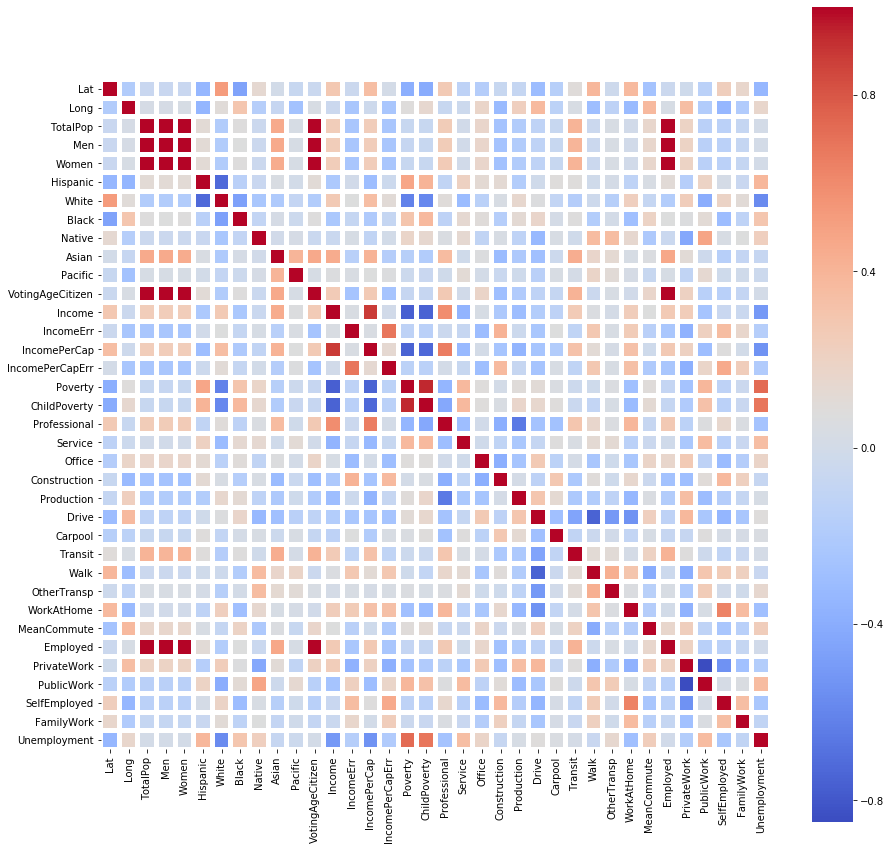

In [15]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,cbar = True, square = True, annot = False, fmt = '.1f',xticklabels = True, yticklabels=True, cmap = 'coolwarm',linewidths = 4,ax=ax)
plt.show()

### **Postive Correlation Pairs:**

1.) Unemployment & Poverty

2.) Work at Home & Self Employment

3.) Income & Professional

4.) Work Environment

### **Negative Correlation Pairs:**

1.)  Income & Poverty Rate

2.) Income & Child Poverty Rate

3.) Unemployment Rate

4.) Income Per Capita

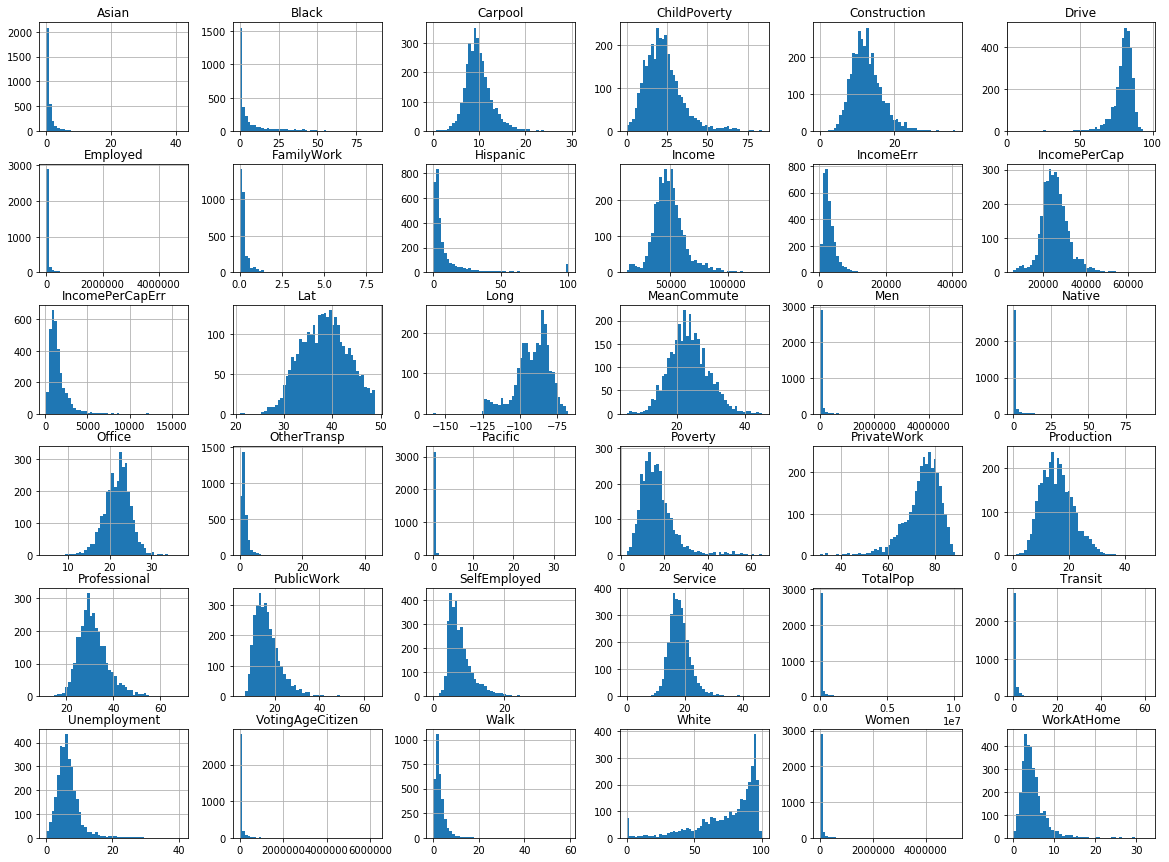

In [16]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

Low Income    1708
Above         1512
Name: Low_Income_Class, dtype: int64


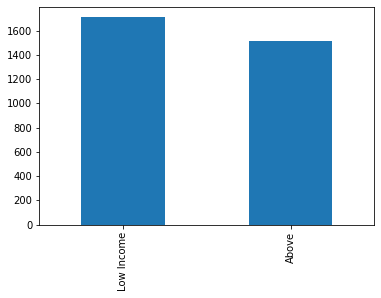

In [17]:
print(df.Low_Income_Class.value_counts())
df.Low_Income_Class.value_counts().plot.bar()
plt.show()

As we can see above, our class labels are pretty balanced. Specifically, when running accuracy scores vs. balanced accuracy scores, we did not see much of a difference. 

In [18]:
df_perc.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,0.013,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,0.011,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,0.017,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,0.017,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,0.004,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income


### Distribution of Classifier

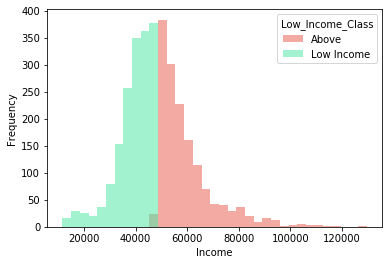

In [19]:
colors = ['#e96556', '#56e9a9'] #from color picker in google
df_perc.pivot(columns = "Low_Income_Class", values = "Income").plot.hist(bins = 35,alpha = .55, color = colors)
plt.xlabel('Income')
plt.show()

Looking at the distribution of our classifier, we can see that it is as intended, with the cutoff being at $48,500

In [20]:
race_gender = ['Men','Women',	'Hispanic','White',	'Black',	'Native',	'Asian','Pacific']
poverty = ['Poverty','ChildPoverty']
workers = ['Professional',	'Service'	,'Office',	'Construction',	'Production']
commute = ['Drive',	'Carpool',	'Transit','Walk',	'OtherTransp',	'WorkAtHome',	'MeanCommute']
sector  = ['PrivateWork','PublicWork',	'SelfEmployed','FamilyWork']
unemployment = ['Unemployment']

colors = ['#e96556', '#56e9a9'] #from color picker in google
def income_distb(lst):
  for i in lst:
    df_perc.pivot(columns = "Low_Income_Class", values = i).plot.hist(bins = 35,alpha = .55, color = colors)
    plt.xlabel(i)

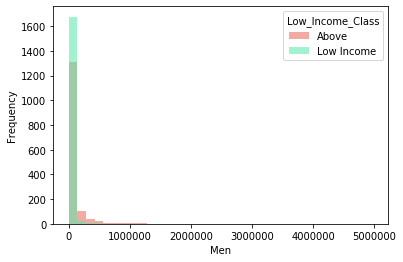

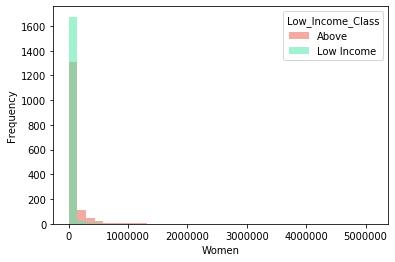

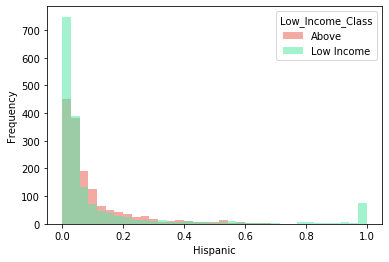

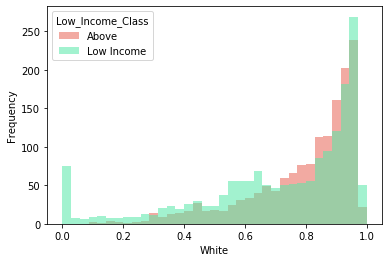

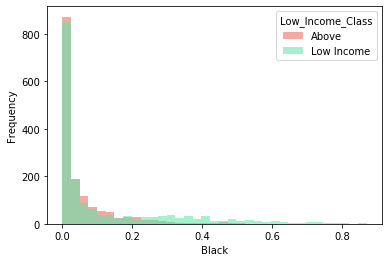

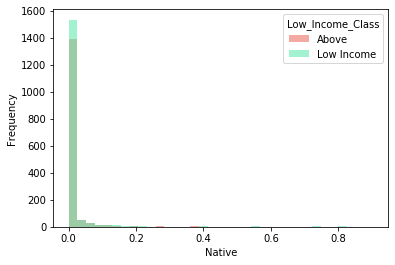

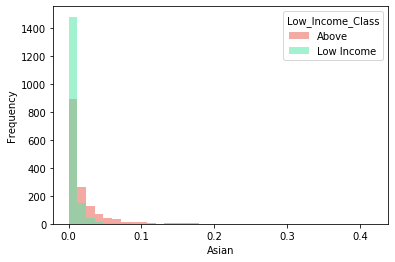

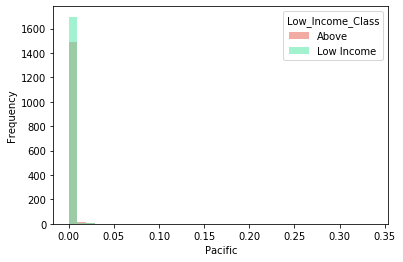

In [21]:
income_distb(race_gender)

### Race:
In the race distributions above, we can see the majority are skewed left with a higher frequency of Low income. Since this is at the county level it is pretty expected to have the left skew. Where we have a right skew, is the race category of whites. 

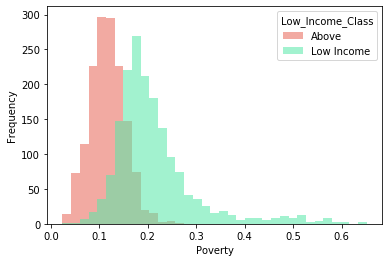

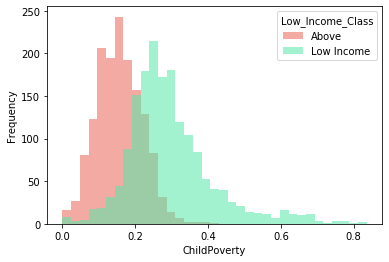

In [22]:
income_distb(poverty)

### Poverty:

From the above, we can gather that the less amount of poverty you have, the higher the frequency of above income people you have per county.

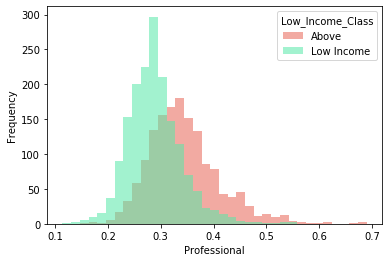

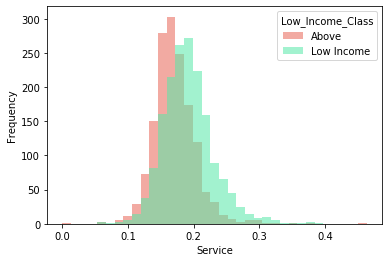

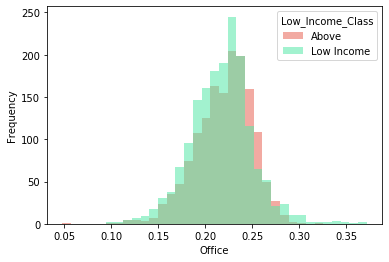

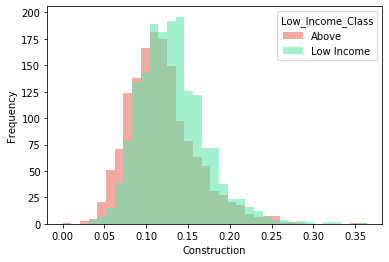

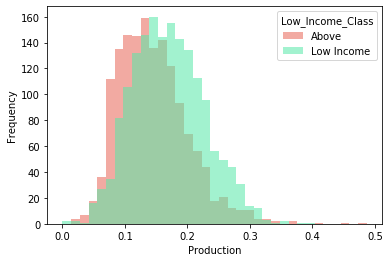

In [23]:
income_distb(workers)

### Worker Type:

From the above, where we saw the biggest discrepancy, was between the amount of professional workers. We can see that counties with higher amounts of professional works have larger amounts of above low income earners.

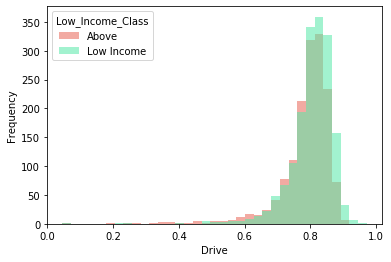

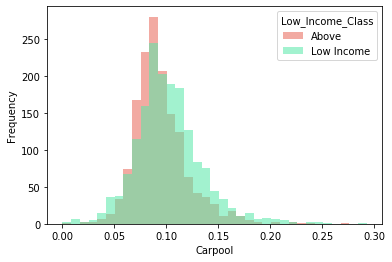

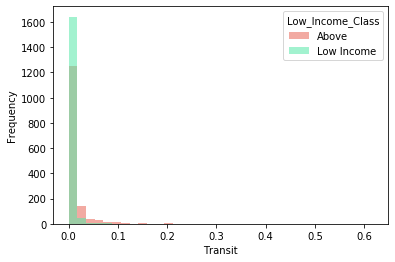

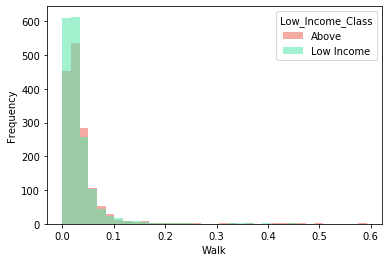

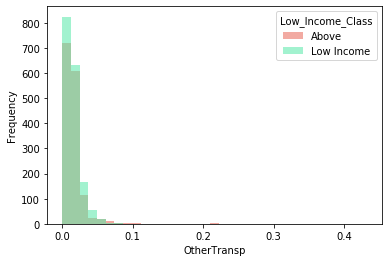

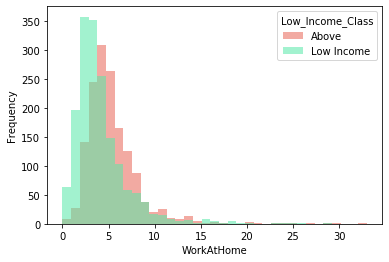

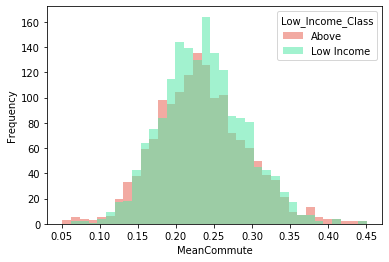

In [24]:
income_distb(commute)

### Commute Types:

The distribution of low income and above income earners were somewhat equal throughout. Where we saw the biggest difference was possibly with work at home. 

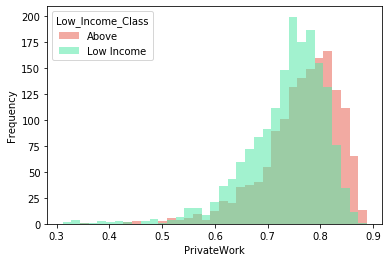

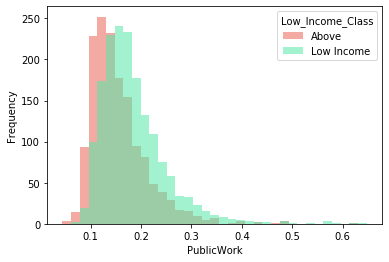

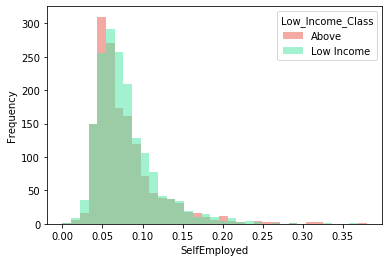

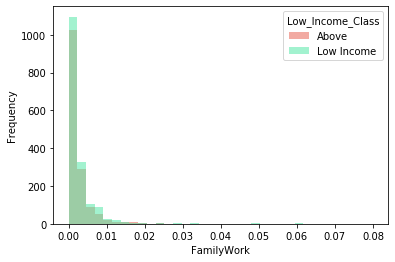

In [25]:
income_distb(sector)

### Work Sector:

The distribution of low income and above income earners were somewhat equal throughout. Where we saw the biggest difference was possibly with the amount of private work taken place in a county.

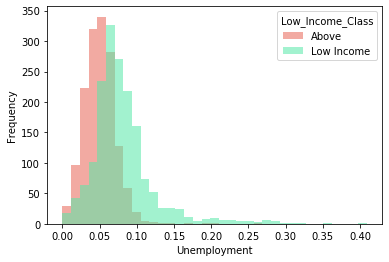

In [26]:
income_distb(unemployment)

### Unemployment:

Not suprisingly, we see that with higher unemployment, the higher the frequency of low income earners.

## **GeoPandas Viz**

In [27]:
import shapefile as shp

In [28]:
us_dbf = shp.Reader('cb_2018_us_state_20m.dbf')

In [29]:
us_shx = shp.Reader('cb_2018_us_state_20m.shx')

In [30]:
conda install pandas fiona shapely pyproj rtree

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [31]:
conda install geopandas

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
conda install descartes

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
import shapefile

In [34]:
from shapely.geometry import Point, LineString
import geopandas as gpd
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_perc['Long'],df_perc['Lat'])]
geometry[:3]

In [35]:
state_map = gpd.read_file('cb_2018_us_state_20m.shp')
state_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


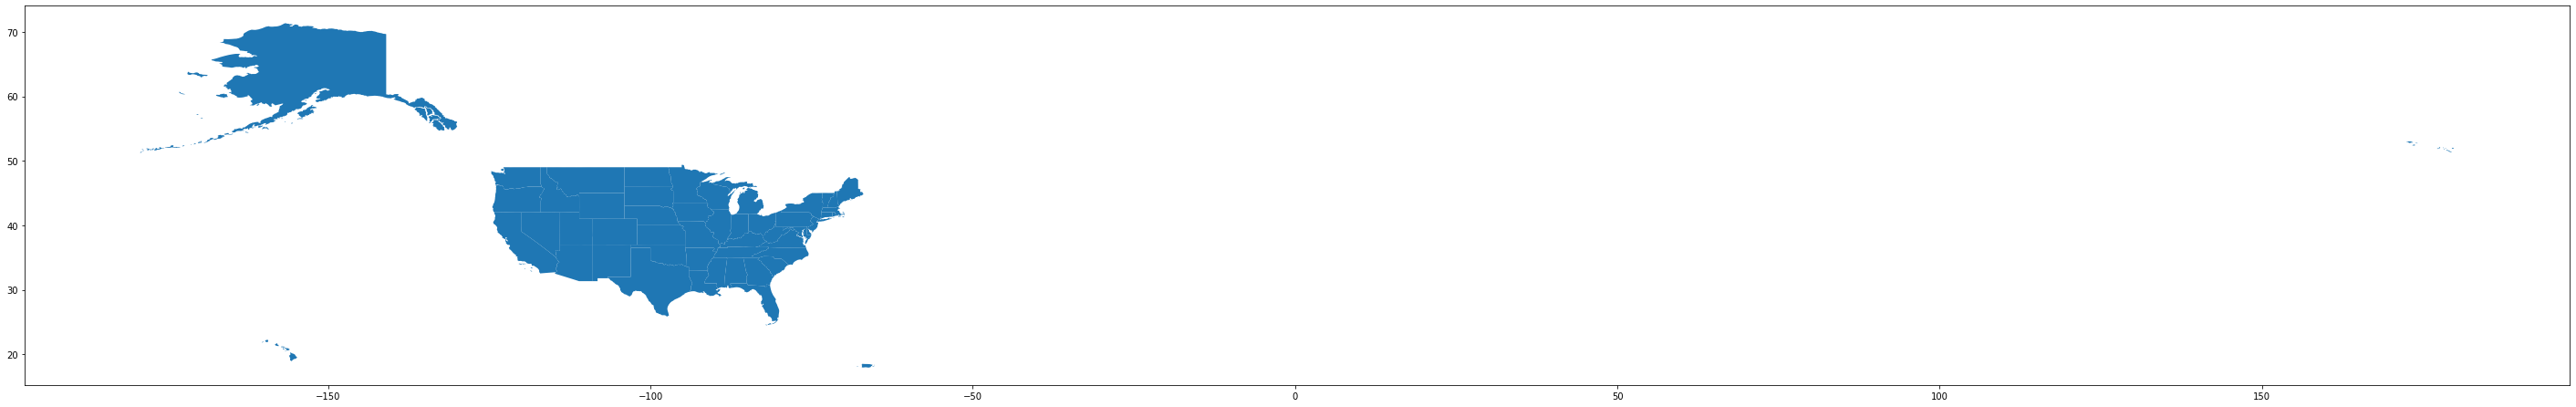

In [36]:
fig,ax = plt.subplots(figsize = (50,50))
state_map.plot(ax = ax)
plt.show()

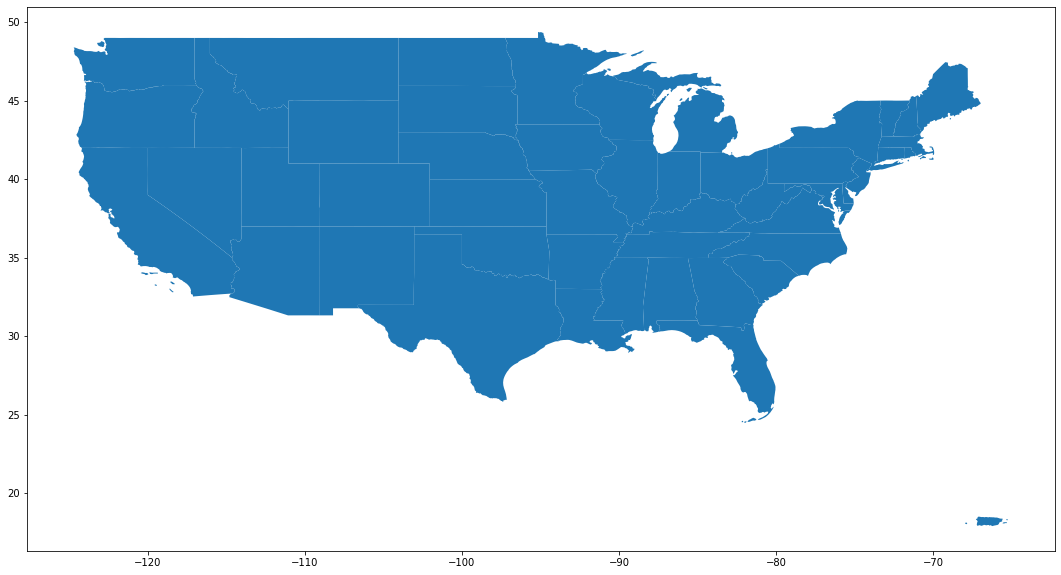

In [37]:
mainland = state_map[(state_map['NAME'] != 'Alaska') & (state_map['NAME'] != 'Hawaii')]
mainland.plot(figsize=(20, 10))
plt.show()

In [38]:
geo_df = gpd.GeoDataFrame(df_perc,crs = crs, geometry = geometry) #create geometry column
geo_df.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class,geometry
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above,POINT (-86.64449 32.53638)
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above,POINT (-87.74607 30.65922)
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income,POINT (-85.40546 31.87067)
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income,POINT (-87.12715 33.01589)
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income,POINT (-86.56725 33.97745)


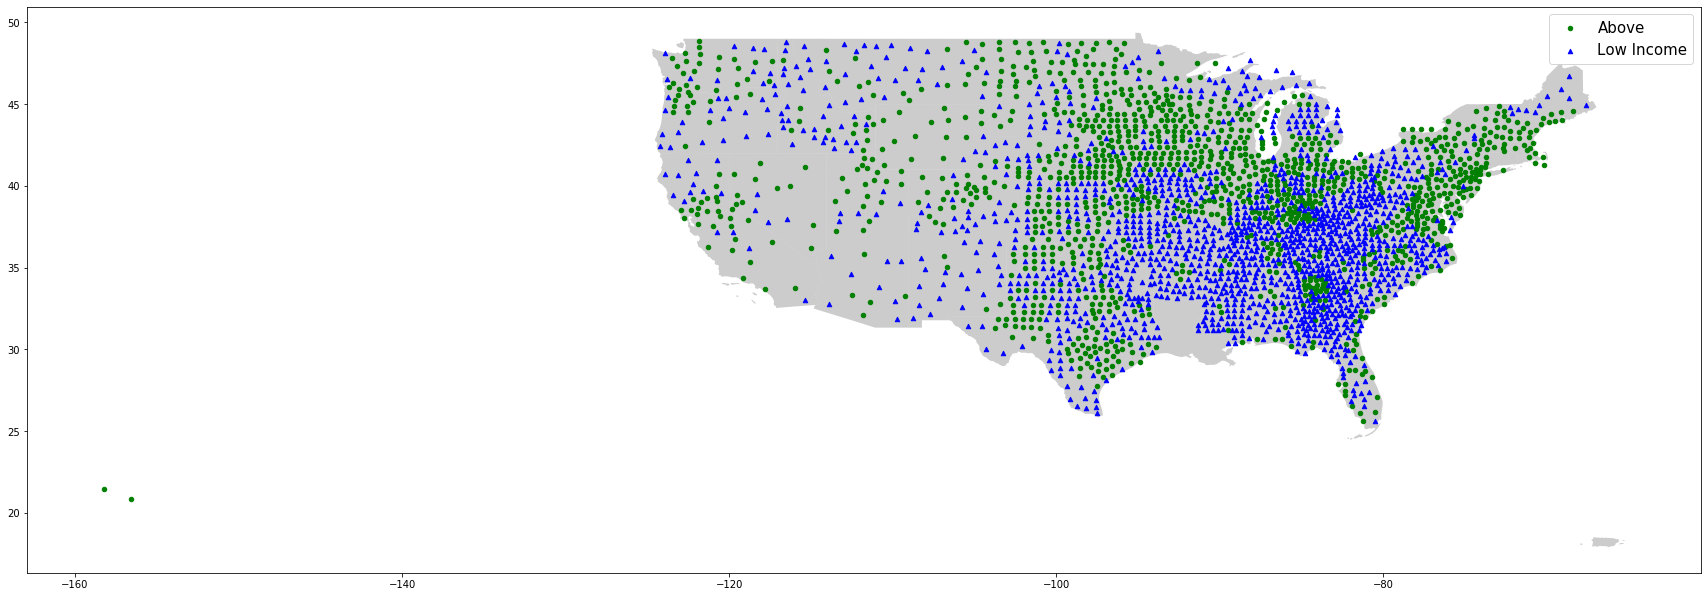

In [39]:
fig,ax = plt.subplots(figsize=(30, 20))
mainland.plot(ax = ax,alpha = .4,color = "grey")
geo_df[geo_df['Low_Income_Class']=='Above'].plot(ax = ax, markersize = 20, color = "green",marker = "o",label = "Above")
geo_df[geo_df['Low_Income_Class']=='Low Income'].plot(ax = ax, markersize = 20, color = "blue",marker = "^",label = "Low Income")
plt.legend(prop = {'size':15})
plt.show()

### Map:

From the above map, we can see pockets of low and above income earners. For example, in the east coast we can see high amounts of above income earners and in the rural areas of Ohio, Kentucky, and Tenessee - a large number of low income earners. We will need to gather more coordinates data in Louisiana. We also will be investigating into other variables. 

###  Data Cleansing:

So far, we have performed data cleaning and removed rows that contained missing values. There were little missing values within the dataset but the attribute ChildPoverty had one missing. We converted several columns into percentages. The attributes race, poverty rate, type of work, commute and type of employment are all numbers that represent the percentage of the population, so we wanted to make sure that was reflected within the data. We also created dummy variables for the categorical values within the state column. Before we started our analysis, we removed the columns Longitude, Latitude, County, CountyID and Income. Income was removed because this is how we created our classifier Low_Income_Class (Low Income <=$48,500 & Above  >$48,500).

### **Machine Learning (ML) [10]: Which ML techniques have you tried? What others will you apply?**

ML techniques will be listed further on, below. They will consist of multiple classification techniques and linear regression. As of right now we are planning on executing all of our techniques with default parameters. In our final submission, we plan on submitting our techniques with parameter optimization, and further analysis. 

## **Classification:**
Below are the default classification techniques that we have executed:

1.) Logisitic Regression

2.) K Nearest Neighbor

3.) Naive Bayes

4.) Decision Tree

5.) Random Forest

6.) Linear Discriminant Analysis

7.) Support Vector Machine

A summarization, and analysis will be provided at the end. 

In [40]:
df_classification = df_perc2
df_classification.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,0.013,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,0.011,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,0.017,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,0.017,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,0.004,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income


In [41]:
df_y = df_classification.Low_Income_Class
df_X = df_classification.drop(columns=['Low_Income_Class', 'County', 'Income','Lat','Long'])  #dropping class column, county and countyID, and income since we used this to create our classifier

In [42]:
df_X = pd.get_dummies(df_X)
df_X.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,55036,26899,28137,0.027,0.754,0.189,0.003,0.009,0.0,41016,...,0,0,0,0,0,0,0,0,0,0
1003,203360,99527,103833,0.044,0.831,0.095,0.008,0.007,0.0,155376,...,0,0,0,0,0,0,0,0,0,0
1005,26201,13976,12225,0.042,0.457,0.478,0.002,0.006,0.0,20269,...,0,0,0,0,0,0,0,0,0,0
1007,22580,12251,10329,0.024,0.746,0.220,0.004,0.000,0.0,17662,...,0,0,0,0,0,0,0,0,0,0
1009,57667,28490,29177,0.090,0.874,0.015,0.003,0.001,0.0,42513,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(df_X)

df_X_norm = min_max_scaler.transform(df_X)
df_X_norm = pd.DataFrame(df_X_norm,columns = df_X.columns,index = df_X.index)

In [44]:
df_X_norm.isna().sum()

TotalPop               0
Men                    0
Women                  0
Hispanic               0
White                  0
                      ..
State_Virginia         0
State_Washington       0
State_West Virginia    0
State_Wisconsin        0
State_Wyoming          0
Length: 85, dtype: int64

In [45]:
child_pov_mean =  df_X_norm.ChildPoverty.mean()
df_X_norm.ChildPoverty.fillna(child_pov_mean,inplace = True)
df_X_norm.isna().sum().sum()

0

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, yTrain, yTest = train_test_split(df_X_norm,df_y, test_size=0.3, random_state=33) #updated test sample to 30%

## **Logistic Regression**

The goal of binary logistic regression is to have output be Low_Income or Above. This is accomplished through measuring the relationship between our dependent variable and our dependent variable through estimating the probability by using the sigmoid function. The Sigmoid function creates "S" shaped curve.

Steps:
                                                 
1.) Inputs ====> LM

2.) Probabilities =====> Sigmoid

3.) Values closer to 0 or 1 =====> Thresh


In [47]:
logclf = LogisticRegression()#model with default values 

In [48]:
logclf.fit(Xtrain, yTrain) #fitting our LR model to the training X and y 
logpred_train = logclf.predict(Xtrain)   #predicting our train X with the model 
logpred_test = logclf.predict(Xtest)

In [49]:
print(logclf.score(Xtrain,yTrain))

0.9006211180124224


In [50]:
log_testacc = logclf.score(Xtest,yTest)
print(log_testacc)

0.8788819875776398


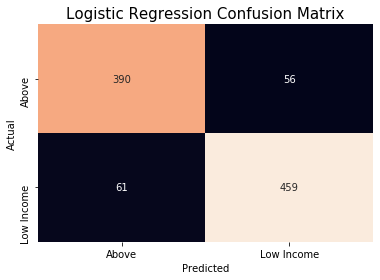

In [51]:
confusion_matrix = pd.crosstab(yTest, logpred_test, rownames=['Actual'], colnames=['Predicted']) #creating the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Logistic Regression Confusion Matrix", fontsize = 15)
plt.show()

In [52]:
balanced_accuracy_score(yTest, logpred_test)

0.8785658847878579

In [53]:
print(classification_report(yTest, logpred_test))

              precision    recall  f1-score   support

       Above       0.86      0.87      0.87       446
  Low Income       0.89      0.88      0.89       520

    accuracy                           0.88       966
   macro avg       0.88      0.88      0.88       966
weighted avg       0.88      0.88      0.88       966



## **KNN Classifier**


KNN is classifies based on similarity measures (ie. Cosine or Euclidean Distance). 

Smaller K:

1.) Low Bias

2.) High Variance

Bigger K: 

1.) High Bias

2.) Low Variance

In [54]:
knnclf = neighbors.KNeighborsClassifier() #default model values 

In [55]:
knnclf.fit(Xtrain, yTrain)#creating the KNN classifier and fitting the model with our training data - X and y
knnpred_train = knnclf.predict(Xtrain) #using train X data to predict our training class values within our KNN model
knnpred_test = knnclf.predict(Xtest)

In [56]:
print(knnclf.score(Xtrain,yTrain))

0.8895297249334516


In [57]:
knn_testacc = knnclf.score(Xtest,yTest)
print(knn_testacc)

0.8385093167701864


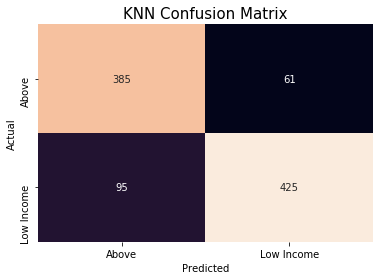

In [58]:
confusion_matrix = pd.crosstab(yTest, knnpred_test, rownames=['Actual'], colnames=['Predicted']) #using crosstab to help us crate the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("KNN Confusion Matrix", fontsize = 15)
plt.show()

In [59]:
print(classification_report(yTest, knnpred_test))

              precision    recall  f1-score   support

       Above       0.80      0.86      0.83       446
  Low Income       0.87      0.82      0.84       520

    accuracy                           0.84       966
   macro avg       0.84      0.84      0.84       966
weighted avg       0.84      0.84      0.84       966



## **Naive Bayes**

Naive Bayes is from the Bayes theorem that comes from the assumption that features in a class are unrelated to any other features. Gaussian Naive Bayes is the default in sklearn, and is used based on the normal distribution of data. 

P(class|data) = P(data|class) x P(class)/P(data)

In [60]:
nbclf = naive_bayes.GaussianNB()    #initating our naive bayes classifier 

In [61]:
nbclf.fit(Xtrain, yTrain) #creating the naive bayes classifier and fitting the model with our training data - X and
nbpred_train = nbclf.predict(Xtrain)  #predicting our y training data cases 
nbpred_test =  nbclf.predict(Xtest)

In [62]:
nbclf.fit(Xtrain, yTrain) #creating the naive bayes classifier and fitting the model with our training data - X and
nbpred_train = nbclf.predict(Xtrain)  #predicting our y training data cases 
nbpred_test =  nbclf.predict(Xtest)

In [63]:
print(nbclf.score(Xtrain,yTrain))

0.6561668145519077


In [64]:
nb_testacc = nbclf.score(Xtest,yTest)
print(nb_testacc)

0.6801242236024845


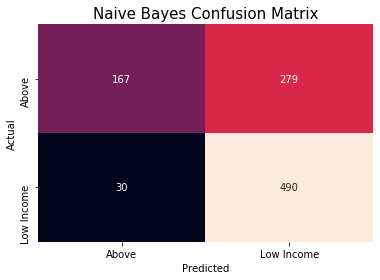

In [65]:
confusion_matrix = pd.crosstab(yTest, nbpred_test, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Naive Bayes Confusion Matrix", fontsize = 15)
plt.show()

In [66]:
print(classification_report(yTest, nbpred_test))

              precision    recall  f1-score   support

       Above       0.85      0.37      0.52       446
  Low Income       0.64      0.94      0.76       520

    accuracy                           0.68       966
   macro avg       0.74      0.66      0.64       966
weighted avg       0.73      0.68      0.65       966



## **Decision Tree Classifier**

A Decision tree in classification breaks down data into smaller subsets based on information gain and entropy. A Decision tree works from the top down. The main idea of a decision tree is to find thr attributes that have the highest information gain. 

In [67]:
treeclf = DecisionTreeClassifier() #initating our decision tree classifier 

In [68]:
treeclf.fit(Xtrain, yTrain) #creating the DT classifier and fitting the model with our training data - X and y
treepred_train = treeclf.predict(Xtrain)
treepred_test = treeclf.predict(Xtest)

In [69]:
print(treeclf.score(Xtrain,yTrain))

1.0


In [70]:
tree_testacc = treeclf.score(Xtest,yTest)
print(tree_testacc)

0.8674948240165632


In [71]:
print(classification_report(yTest, treepred_test))

              precision    recall  f1-score   support

       Above       0.84      0.88      0.86       446
  Low Income       0.89      0.86      0.87       520

    accuracy                           0.87       966
   macro avg       0.87      0.87      0.87       966
weighted avg       0.87      0.87      0.87       966



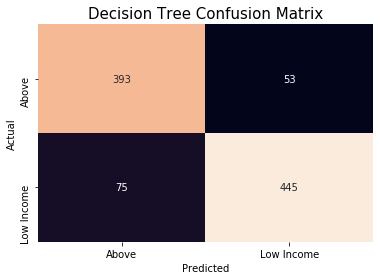

In [72]:
confusion_matrix = pd.crosstab(yTest, treepred_test, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Decision Tree Confusion Matrix", fontsize = 15)
plt.show()

#plotting the predicted classes verses

In [73]:
tree = export_graphviz(treeclf, out_file=None, feature_names=Xtrain.columns, class_names=['Above','Low Income'])
graph = Source(tree)

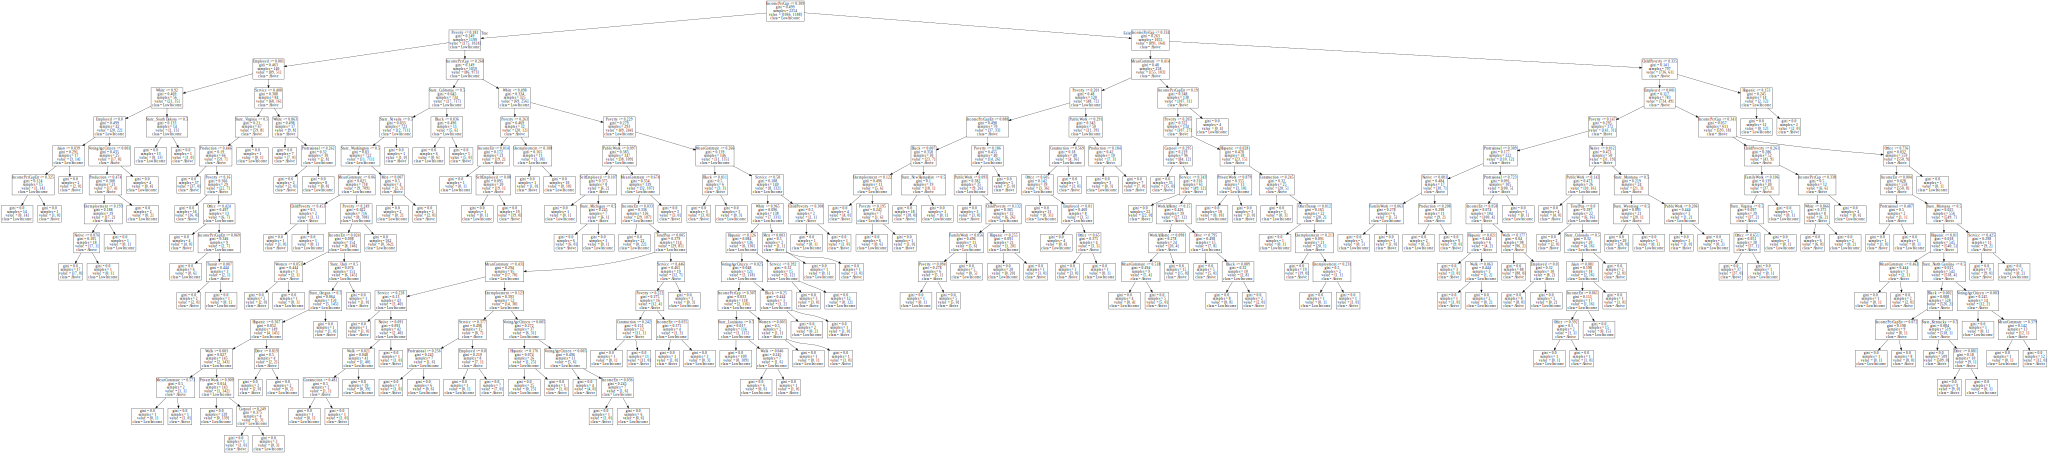

In [74]:
display(SVG(graph.pipe(format='svg')))

## **Random Forest Classifier**

In [75]:
rfclf = RandomForestClassifier()

In [76]:
rfclf.fit(Xtrain, yTrain) #creating the RF classifier and fitting the model with our training data - X and y
rfpred_train = rfclf.predict(Xtrain)
rfpred_test = rfclf.predict(Xtest)

In [77]:
print(rfclf.score(Xtrain,yTrain))

0.9920141969831411


In [78]:
rf_testacc = rfclf.score(Xtest,yTest)
print(rf_testacc)

0.8757763975155279


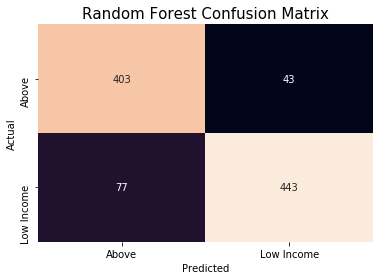

In [79]:
confusion_matrix = pd.crosstab(yTest, rfpred_test, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Random Forest Confusion Matrix", fontsize = 15)
plt.show()

#plotting the predicted classes verses the actual test classes into a matrix

In [80]:
print(classification_report(yTest, rfpred_test))

              precision    recall  f1-score   support

       Above       0.84      0.90      0.87       446
  Low Income       0.91      0.85      0.88       520

    accuracy                           0.88       966
   macro avg       0.88      0.88      0.88       966
weighted avg       0.88      0.88      0.88       966



## **Support Vector Machine**


Performs Classification by finding the hyperplane that maximized the margin between the two classes. 

In [81]:
svmclf = svm.SVC(random_state = 33)

In [82]:
svmclf.fit(Xtrain,yTrain)
svmclfpred_train = svmclf.predict(Xtrain)
svmclfpred_test = svmclf.predict(Xtest)

In [83]:
print(svmclf.score(Xtrain,yTrain))

0.8371783496007098


In [84]:
svm_testacc = svmclf.score(Xtest,yTest)
print(svm_testacc)

0.8240165631469979


In [85]:
print(classification_report(yTest, svmclfpred_test))

              precision    recall  f1-score   support

       Above       0.79      0.84      0.81       446
  Low Income       0.85      0.81      0.83       520

    accuracy                           0.82       966
   macro avg       0.82      0.83      0.82       966
weighted avg       0.83      0.82      0.82       966



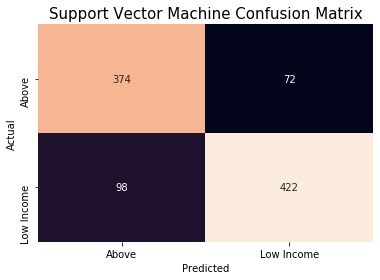

In [86]:
confusion_matrix = pd.crosstab(yTest, svmclfpred_test, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Support Vector Machine Confusion Matrix", fontsize = 15)
plt.show()

Directly Below is the summary of the classification results. Further on (near the bottom) will be the summary of the regression results. 

## **Summarizing Classification Results**

In [87]:
from sklearn import neighbors, naive_bayes, feature_selection      
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [88]:
logclf = LogisticRegression()#model with default values 
logclf.fit(Xtrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
knnclf = neighbors.KNeighborsClassifier() #default model values 
knnclf.fit(Xtrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
nbclf = naive_bayes.GaussianNB()    #initating our naive bayes classifier 
nbclf.fit(Xtrain,yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
treeclf = DecisionTreeClassifier() #initating our decision tree classifier 
treeclf.fit(Xtrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
rfclf = RandomForestClassifier()
rfclf.fit(Xtrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
svmclf = svm.SVC(random_state = 33,probability = True)
svmclf.fit(Xtrain,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=33,
    shrinking=True, tol=0.001, verbose=False)

In [94]:

logpred_prob = logclf.predict_proba(Xtest)
knnpred_prob = knnclf.predict_proba(Xtest)
nbpred_prob = nbclf.predict_proba(Xtest)
treepred_prob = treeclf.predict_proba(Xtest)
rfpred_prob = rfclf.predict_proba(Xtest)
svmpred_prob = svmclf.predict_proba(Xtest)

In [96]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(yTest, logpred_prob[:,1], pos_label='Low Income')
fpr2, tpr2, thresh2 = roc_curve(yTest, knnpred_prob[:,1], pos_label='Low Income')
fpr3, tpr3, thresh3 = roc_curve(yTest, nbpred_prob[:,1], pos_label='Low Income')
fpr4, tpr4, thresh4 = roc_curve(yTest, treepred_prob[:,1], pos_label='Low Income')
fpr5, tpr5, thresh5 = roc_curve(yTest, rfpred_prob[:,1], pos_label='Low Income')
fpr7, tpr7, thresh7 = roc_curve(yTest, svmpred_prob[:,1], pos_label='Low Income')

In [97]:
random_probs = [0 for i in range(len(yTest))] #blue line for guide if usesful
p_fpr, p_tpr, _ = roc_curve(yTest, random_probs, pos_label='Above')

In [100]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(yTest, logpred_prob[:,1])
auc_score2 = roc_auc_score(yTest, knnpred_prob[:,1])
auc_score3 = roc_auc_score(yTest, nbpred_prob[:,1])
auc_score4 = roc_auc_score(yTest, treepred_prob[:,1])
auc_score5 = roc_auc_score(yTest, rfpred_prob[:,1])
auc_score7 = roc_auc_score(yTest, svmpred_prob[:,1])

labels = ['LOG','KNN','NB','DT','RF','LDA','SVM']
auc_lst = [auc_score1,auc_score2,auc_score3,auc_score4,auc_score5,auc_score7]
auc_dict = {}
for a,b in zip(labels,auc_lst):
    auc_dict[a] = b
print(auc_dict)

{'LOG': 0.9560322525008623, 'KNN': 0.9192738875474302, 'NB': 0.7262439634356674, 'DT': 0.848447740600207, 'RF': 0.951455243187306, 'LDA': 0.9182951017592274}


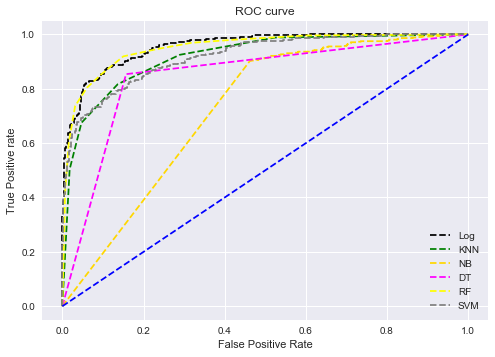

In [103]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='Log')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='gold', label='NB')
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='DT')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='RF')
plt.plot(fpr7, tpr7, linestyle='--',color='gray', label='SVM')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In the above ROC curve, we can see that the top performing default classifiers, in terms of true positive rate, are:

    1.) Logisitic Regression
    2.) Random Forest
    3.) KNN

The worst performing classifier in terms of the ROC curve was Naive Bayes. 

### All Classification Reports:

In [105]:
print('Logistic Regression:\n',classification_report(yTest, logpred_test))
print('\nKNN:\n',classification_report(yTest, knnpred_test))
print('\nNaive Bayes:\n',classification_report(yTest, nbpred_test))
print('\nDecision Tree:\n',classification_report(yTest, treepred_test))
print('\nRandom Forest:\n',classification_report(yTest, rfpred_test))
print('\nSVM:\n',classification_report(yTest, svmclfpred_test))

Logistic Regression:
               precision    recall  f1-score   support

       Above       0.86      0.87      0.87       446
  Low Income       0.89      0.88      0.89       520

    accuracy                           0.88       966
   macro avg       0.88      0.88      0.88       966
weighted avg       0.88      0.88      0.88       966


KNN:
               precision    recall  f1-score   support

       Above       0.80      0.86      0.83       446
  Low Income       0.87      0.82      0.84       520

    accuracy                           0.84       966
   macro avg       0.84      0.84      0.84       966
weighted avg       0.84      0.84      0.84       966


Naive Bayes:
               precision    recall  f1-score   support

       Above       0.85      0.37      0.52       446
  Low Income       0.64      0.94      0.76       520

    accuracy                           0.68       966
   macro avg       0.74      0.66      0.64       966
weighted avg       0.73      0

In comparing all of the classification reports, we can see that logisitic regression and random forest holed the highest accuracy. We can alos see that they both hold the highest F1-Score. 

On the opposite end, we can see that Naive Bayes performs far worse in all categories compared to other classifiers. 

## **Regression**
Research Question #3 

Can the household income of a county be predicted with our current dataset? 

In [106]:
df_X_normR = df_X_norm.copy()
df_yR = df_perc2.Income
df_X_normR.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_X_normR = df_X_normR.drop(columns=['IncomeErr','IncomePerCap','IncomePerCapErr']) #to not overfit data

In [108]:
df_yR.head()

CountyId
1001    55317
1003    52562
1005    33368
1007    43404
1009    47412
Name: Income, dtype: int64

In [109]:
df_yR = np.array(df_yR)
df_yR = df_yR.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler().fit(df_yR)
df_yR_norm = min_max_scaler.transform(df_yR)

In [110]:
df_yR_norm

array([[0.37009363],
       [0.34672796],
       [0.18394002],
       ...,
       [0.069656  ],
       [0.03312752],
       [0.02350137]])

In [111]:
#add columns of ones for x0 in regression formula
df_X_normR['Ones'] = 1
df_X_normR.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Ones
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1003,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1005,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1007,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1009,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [112]:
#regression split
XtrainR, XtestR, yTrainR, yTestR = train_test_split(df_X_normR,df_yR_norm, test_size=0.3, random_state=33) #updated test sample to 30%

In [113]:
col_name = []
for col in XtrainR:
    col_name.append(col)
print(col_name)

['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_District of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina

In [114]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
linreg = LinearRegression()

In [115]:
linreg.fit(XtrainR,yTrainR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
#coefficients
w = np.mat(linreg.coef_)
w = w.T
print(w)

[[ 7.55381166e+10]
 [-3.72217354e+10]
 [-3.83163811e+10]
 [ 1.18461609e-01]
 [ 4.45556641e-03]
 [ 4.71916199e-02]
 [ 1.57331467e-01]
 [ 2.18897820e-01]
 [ 1.47259712e-01]
 [-1.42684937e-01]
 [-6.42618179e-01]
 [ 5.00249863e-02]
 [ 4.95704651e-01]
 [ 1.02444410e-01]
 [ 1.31897449e-01]
 [ 1.40676498e-01]
 [ 1.56085014e-01]
 [-1.81944323e+00]
 [-5.88567257e-01]
 [-1.13111877e+00]
 [-1.14581490e+00]
 [-9.45651472e-01]
 [-6.04171753e-01]
 [ 1.13049507e-01]
 [ 2.89946747e+00]
 [-4.31991577e-01]
 [-5.52915573e-01]
 [-4.80957985e-01]
 [-9.69759226e-02]
 [-3.09514999e-02]
 [-3.24096680e-02]
 [ 1.09572649e-01]
 [-2.40584016e-02]
 [-3.00772190e-02]
 [ 2.70652771e-02]
 [-9.65356827e-03]
 [ 6.40499592e-02]
 [ 4.36002389e-03]
 [ 6.67572021e-06]
 [-2.59637833e-02]
 [-1.49550438e-02]
 [-6.21159077e-02]
 [-1.99849606e-02]
 [ 3.54862213e-03]
 [-1.27313137e-02]
 [-2.11489201e-03]
 [-1.96077824e-02]
 [-5.00726700e-03]
 [-9.40370560e-03]
 [-1.60058141e-02]
 [ 4.43938971e-02]
 [ 6.18367195e-02]
 [-1.8696427

In [117]:
from math import *
from sklearn.metrics import mean_squared_error
p = linreg.predict(XtrainR)
error = sqrt(mean_squared_error(yTrainR,p))
print('Default Regression RMSE on Train:\n',round(error,2))

Default Regression RMSE on Train:
 0.04


In [118]:
yMat = np.mat(yTrainR)
yMat = yMat.A.ravel()

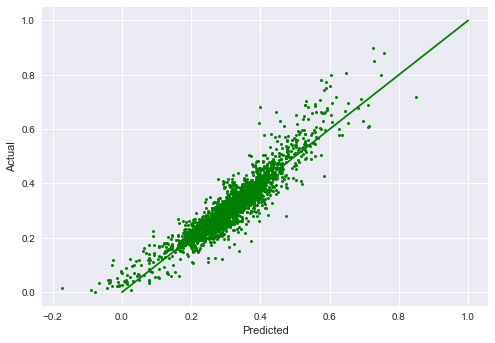

In [119]:
plt.plot(p,yMat,'go',markersize = 3)
plt.plot([0,1],[0,1],'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The above visualization shows how how close we are when we predict on the training set. We can see that a lot of the predictions are close to the regression line. As the predictions get higher though, we start see that the predictions get further away. 

In [120]:
p_test = linreg.predict(XtestR)
error = sqrt(mean_squared_error(yTestR,p_test))
print('Default Regression RMSE on Test:\n',round(error,2))

Default Regression RMSE on Test:
 0.05


In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [132]:
reg = LinearRegression()

In [133]:
reg.fit(XtrainR, yTrainR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
p_train = reg.predict(XtrainR)
reg_rmse_train = sqrt(mean_squared_error(yTrainR,p_train))
reg_r2_train = r2_score(yTrainR,p_train)
print('RMSE on Training Data:\n',round(reg_rmse_train,2))
print('R-squared on Training Set:\n',reg_r2_train)

RMSE on Training Data:
 0.04
R-squared on Training Set:
 0.8543097323800672


In [137]:
p_validation = reg.predict(XtestR)
reg_rmse_test = sqrt(mean_squared_error(yTestR,p_validation))
reg_r2_test = r2_score(yTestR,p_validation)
print('RMSE on Testing Data:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set:\n',reg_r2_test)

RMSE on Testing Data:
 0.05
R-squared on Testing Set:
 0.8427849676557277


### Regression Next Steps:

1.) Perform regularized regression

    i. Ridge
        a. Penalizes the model for the sum of squared value of weight
        b. gives small, distributed weights b/c l2 focuses more on driving heavier wieghts
        c. sparser data ==> use ridge
    
    ii. Lasso
        a. Penalized for the sum of absolute values of the weights
        b. give sparse weights (more zeros) b/c l1 cares more about driving down big weights
        c. more features ==> use lasso or elasticnet
    
    
    iii. ElasticNet
        a. Hybrid of Ridge and Lasso
2.) Perform other forms of regression

    i. svm, random forest, etc. 

### Analysis of Regression:

With an adjusted R squared on the training set, we can interpret that our 85% of our variance is currently explained by our model. 

In the next steps of the project we plan to interpret what variables capture the most of this variance, and will see if we can execute some dimensionality reduction. 

Futhermore, we will try regularized regresion along with some parameter tuning that will most likely end some form of elasic net regression. 


**In Regards to Research Question # 3**

We can say right now, that our model does a pretty fair job of prediciting income. As stated before, we will look further into what variables specifically do this. 



Next, we need to focus on parameter optimization. For each of the methods we have tried so far, we just obtained a baseline for what each method is producing since we used the default values. We need to create some validation curves for each of the parameters. For example, looking at different values of K in KNN, different values of C in logistic regression, etc.
 
We also would like to try feature selection - this would be a way we could reduce the complexity of the model and see which features are the best at predicting our class variable. In addition, we can try bagging and/or boosting ensemble learners (AdaBoost, Gradient Boosting) to optimize the model. 